# 1^ Parte

In [79]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
from typing import Tuple
import emcee
from datetime import datetime, timedelta

Carico il file di dati e guardo com'è fatto...

In [80]:
dati = pd.read_csv('dpc-covid19-ita-regioni.csv',  index_col='data', parse_dates=True)
dati.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleziono i dati relativi al Friuli Venezia Giulia.

In [81]:
dati_friuli=dati.loc[dati['denominazione_regione'] == 'Friuli Venezia Giulia']

# Imposta il numero massimo di colonne da visualizzare a None per mostrare tutte le colonne
pd.set_option('display.max_columns', None)

dati_friuli.head(10)

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,6,6,6,6,0,0,NaN,NaN,6,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,9,9,3,3,0,0,NaN,NaN,9,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,1,0,1,12,13,4,4,0,0,NaN,NaN,13,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Nuovi positivi osservati in Friuli Venezia Giulia')

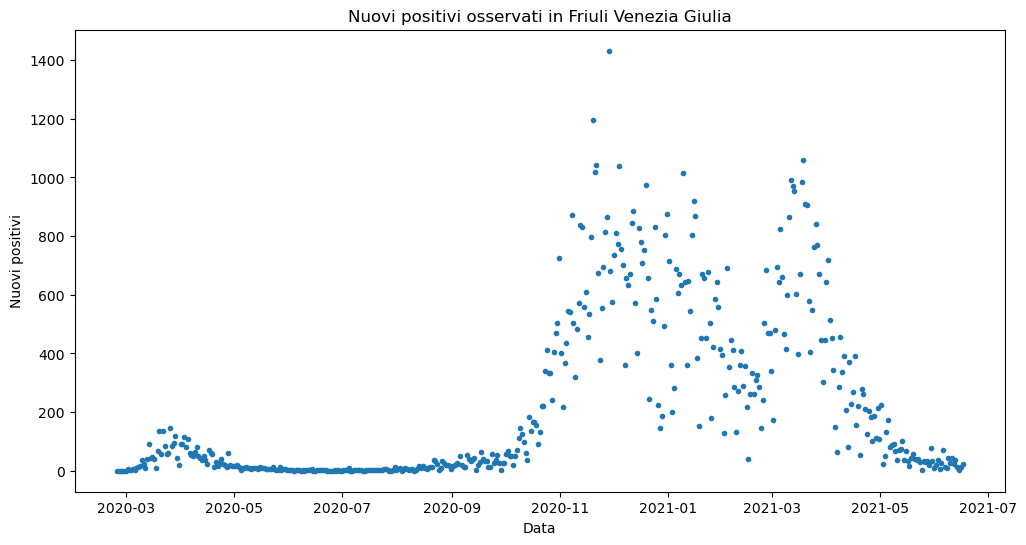

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(dati_friuli.index, dati_friuli["nuovi_positivi"],'.')
plt.xlabel('Data')
plt.ylabel('Nuovi positivi')
plt.title('Nuovi positivi osservati in Friuli Venezia Giulia')

# 2^ Parte

In [83]:
dati_friuli.head(6)

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nelle funzioni logistica e di Gompertz compare il fattore $t-t_0$. Ho scelto di misurare il tempo in giorni e di porre l'origine del tempo alla data (e ora) del primo indice temporale del DataFrame, cioè conto i giorni a partire dal 24 febbraio 2020 (ore 18). Le seguenti celle mostrano come fare questa lettura temporale e sono propedeutiche per scrivere le funzioni che seguono più avanti.

4.958333333333333


Text(0.5, 1.0, 'Nuovi positivi osservati in Friuli Venezia Giulia')

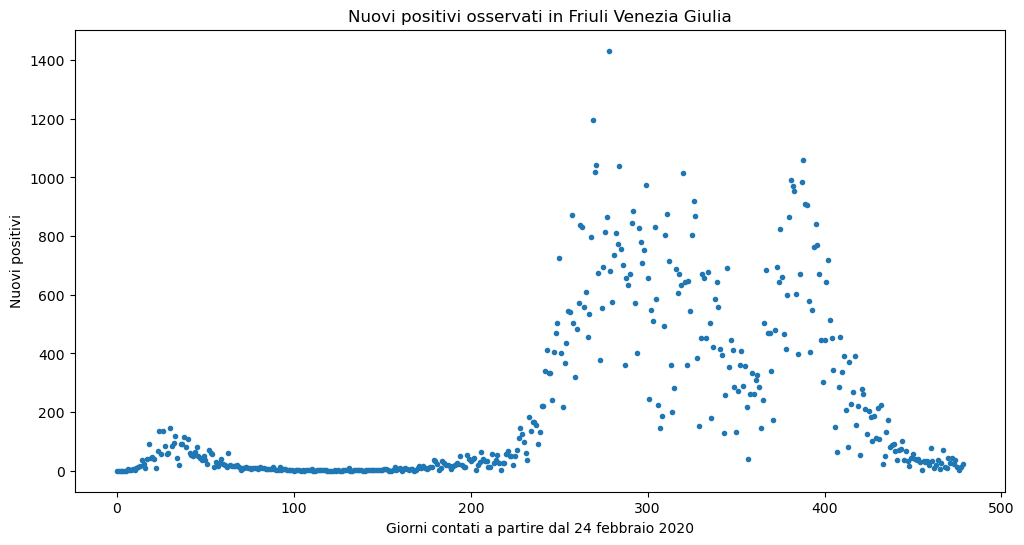

In [84]:
t_0 = dati_friuli.index[0]
differenze_temporali = (dati_friuli.index - t_0).days + (dati_friuli.index - t_0).seconds / (3600 * 24)
print(differenze_temporali[5]) # verifico che in tal modo ottengo correttamente le differenze di tempo espresse in giorni
plt.figure(figsize=(12, 6))
plt.plot(differenze_temporali, dati_friuli["nuovi_positivi"], '.')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
plt.title('Nuovi positivi osservati in Friuli Venezia Giulia')

In [85]:
# pongo lo zero del tempo al giorno e ora del primo indice del DataFrame dati_friuli
inizio_del_tempo = datetime(2020, 2, 24, 18, 0, 0)

# Calcola la data corrispondente a t_0 giorni dopo inizio_del_tempo
t_0_date = inizio_del_tempo + timedelta(days=2)
t_0_date



datetime.datetime(2020, 2, 26, 18, 0)

La seguente cella definisce la funzione logistica: essa accetta come input i tre parametri $N_{tot}$, $k$, $t_0$ e un DataFrame. Cambiando i parametri si può vedere come cambia la curva.

Text(0.5, 1.0, 'Andamento dei contagi secondo la funzione logistica')

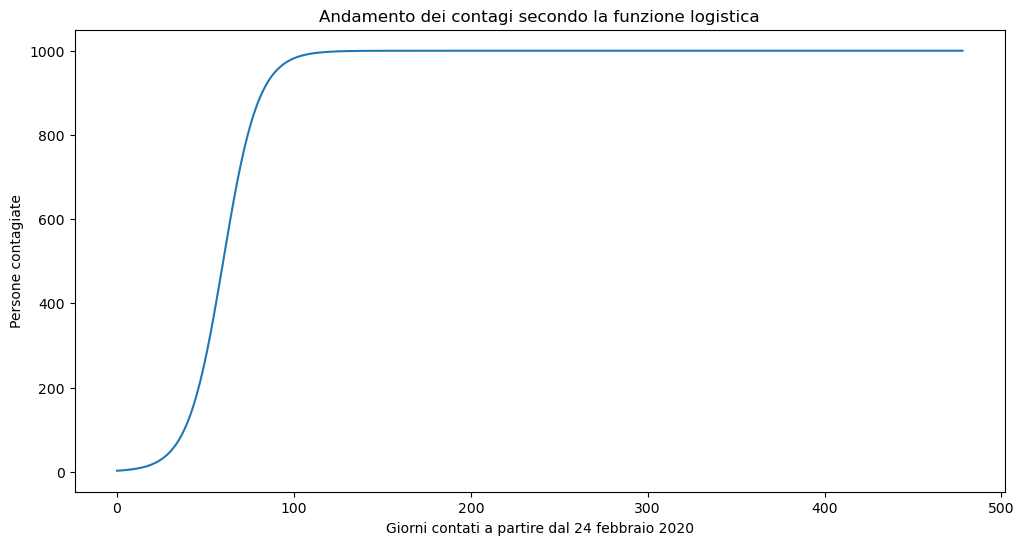

In [86]:
def logistica(N_tot: float, k: float, t_0: float, dati: DataFrame)->ndarray:
    
    '''Calcola per ogni giorno il numero di persone contagiate secondo la funzione logistica'''
    
    inizio_del_tempo = datetime(2020, 2, 24, 18, 0, 0)
    t_0_date = inizio_del_tempo + timedelta(days=t_0)   # t_0_date è la data che corrisponde a t_0
    differenze_temporali = (dati.index - t_0_date).days + (dati.index - t_0_date).seconds / (3600 * 24)
    N_t = N_tot / (1+np.exp(-k * differenze_temporali))
    return N_t

N=logistica(1000, 0.1, 60, dati_friuli)

plt.figure(figsize=(12, 6))
plt.plot(differenze_temporali,N)
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Persone contagiate')
plt.title('Andamento dei contagi secondo la funzione logistica')


Stessa cosa per la funzione di Gompertz.

Text(0.5, 1.0, 'Andamento dei contagi secondo la funzione di Gompertz')

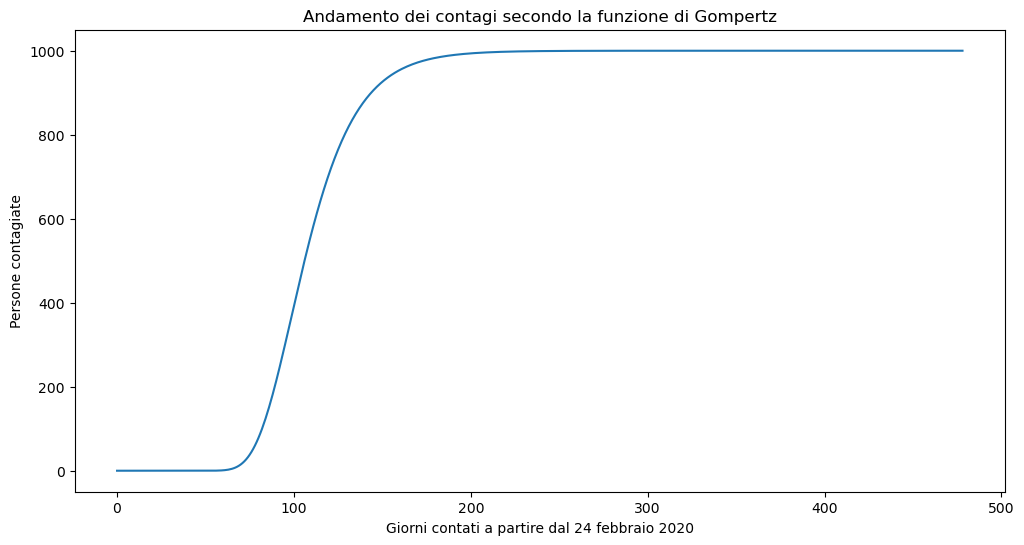

In [87]:
def gompertz(N_tot: float, k: float, t_0: float, dati: DataFrame)->ndarray:
    
    '''Calcola per ogni giorno il numero di persone contagiate secondo la funzione di Gompertz'''
    
    inizio_del_tempo = datetime(2020, 2, 24, 18, 0, 0)
    t_0_date = inizio_del_tempo + timedelta(days=t_0)
    differenze_temporali = (dati.index - t_0_date).days + (dati.index - t_0_date).seconds / (3600 * 24)
    N_t = N_tot * np.exp(-np.log(N_tot)*np.exp(-k*differenze_temporali))
    return N_t

N=gompertz(1000, 0.05, 60, dati_friuli)

plt.figure(figsize=(12, 6))
plt.plot(differenze_temporali,N)
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Persone contagiate')
plt.title('Andamento dei contagi secondo la funzione di Gompertz')

La seguente cella implementa la funzione che calcola il numero dei nuovi contagi gionalieri predetti dalle due funzioni e mostra il grafico.

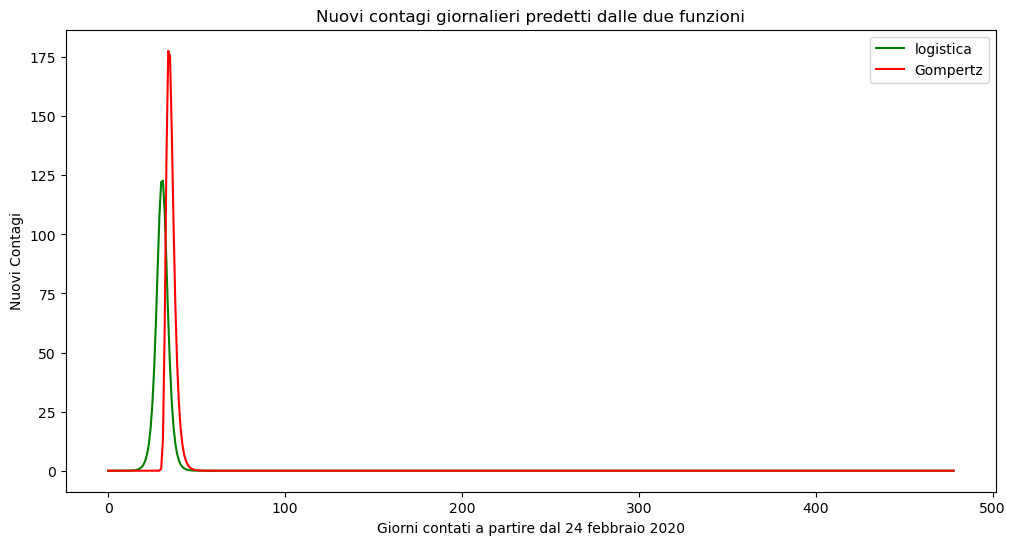

In [88]:
def nuovi_contagi(N_tot: float, k: float, t_0: float, dati: DataFrame)->Tuple[ndarray, ndarray]:
    
    '''Nuovi contagi giornalieri secondo le due funzioni'''
    
    contagi_logistica=logistica(N_tot, k, t_0, dati)
    nuovi_contagi_logistica=np.zeros_like(contagi_logistica)
    nuovi_contagi_logistica[0]=contagi_logistica[0]
    for i in range (1, len(contagi_logistica)):
        nuovi_contagi_logistica[i]=contagi_logistica[i]-contagi_logistica[i-1]
    
    contagi_gompertz=gompertz(N_tot, k, t_0, dati)
    nuovi_contagi_gompertz=np.zeros_like(contagi_gompertz)
    nuovi_contagi_gompertz[0]=contagi_gompertz[0]
    for i in range (1, len(contagi_gompertz)):
        nuovi_contagi_gompertz[i]=contagi_gompertz[i]-contagi_gompertz[i-1]
    
    return nuovi_contagi_logistica, nuovi_contagi_gompertz

nuovi_log, nuovi_gom = nuovi_contagi(1000, 0.5, 30, dati_friuli)

plt.figure(figsize=(12, 6))
plt.plot(differenze_temporali, nuovi_log, color='green', label="logistica")
plt.plot(differenze_temporali, nuovi_gom, color='red', label="Gompertz")
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi Contagi')
plt.title('Nuovi contagi giornalieri predetti dalle due funzioni')
plt.legend()


# 3^ Parte

Seleziono come richisto i primi 35 giorni e creo un DataFrame 'prima_ondata'.

In [89]:
prima_ondata = dati_friuli.head(36)
prima_ondata

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,6,6,6,6,0,0,NaN,NaN,6,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,9,9,3,3,0,0,NaN,NaN,9,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,1,0,1,12,13,4,4,0,0,NaN,NaN,13,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comincio l'analisi dei dati prendendo la funzione logistica come modello teorico per il numero di nuovi positivi.

Il testo dell'esercizio chiedeva esplicitamente solo di scrivere una funzioe di likelihood poissoniana per vincolare i parametri. Tuttavia mi è sembrato ragionevole aggiungere anche un prior, che ho definito nella prossima cella. Vale la pena giustificare le scelte fatte. Naturalmente $N_{tot}$ deve essere un numero positivo trattandosi del numero di contagi totale alla fine dell'ondata.
Inoltre anche il parametro $k$ deve essere positivo perchè sto descrivendo un periodo in cui il virus si sta diffondendo, ovvero un periodo in cui ogni giorno ci sono dei nuovi positivi (la funzione logistica è crescente). Inoltre il valore $\nu$ della distribuzione di Poisson è definito positivo e quindi $k$ deve essere positivo.

La funzione di likelihood è:
$$
L = \prod_{i} \left( \frac{\nu_i^{n_i} \cdot e^{-\nu_i}}{n_i!} \right)
$$

Infine, anzichè definire il prior e la likelihood direttamente, ne ho definito il logaritmo e poi definisco il logaritmo della posterior di conseguenza.

In [90]:
def log_prior(theta):
    
    '''Definisce il logaritmo del prior'''
    
    N_tot, k, t_0 = theta
    if N_tot>=0 and k>=0:
        return 0.0                   
    return -np.inf


def log_likelihood(theta, dati: DataFrame)->float:
    
    '''Calcola la likelihood'''
    
    N_tot, k, t_0 = theta
    n=np.array(dati["nuovi_positivi"])
    nu_l,_= nuovi_contagi(N_tot, k, t_0, dati)  # prendo solo il primo array restituito da nuovi_contagi. Tale array contiene i valori d'aspettazione calcolati con la logistica
    return np.sum(-nu_l+n*np.log(nu_l)) # ho eliminato i termini che non contengono i parametri N_tot, k, t_0



def log_posterior(theta, dati: DataFrame):
    
    '''Calcola la posterior'''
    
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, dati)

Per determinare i parametri di best fit sarebbe da trovare il massimo della posterior. Tuttavia è comodo procedere con un campionamento Markov Chain della posterior. Le seguenti celle preparano e implementano l'algoritmo.

In [91]:
# è meglio trovare già la posizione ottimale da cui partire:

from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_posterior(*args)
initial = np.array([1000,0.1,6])
soln = minimize(nll, initial, args=(prima_ondata))
N_tot_bf, K_bf, t_0_bf = soln.x
print(soln.x)

[1.71340044e+03 6.83650961e-02 6.35804665e+00]


In [92]:
np.random.seed(42)
pos = soln.x *(1+ 1e-6 * np.random.randn(32, 3)) # sparpaglio 32 punti di partenza attorno alla posizione delle stime
nwalkers, ndim = pos.shape # nwalkers sarà pari alla dimensione 0 (cioè il numero di righe) dell'array pos
                           # ndim sarà pari alla dimensione 1 (cioè il numero di colonne) dell'array pos

In [93]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(prima_ondata,))

In [94]:
sampler.run_mcmc(pos, 1000, progress=True)

100%|██████████| 1000/1000 [00:52<00:00, 19.08it/s]


State([[1.68268162e+03 2.27248775e-01 2.65221826e+01]
 [1.67793061e+03 2.31817459e-01 2.65803639e+01]
 [1.80501088e+03 2.23052331e-01 2.72480360e+01]
 [1.73759984e+03 2.29174777e-01 2.66080502e+01]
 [1.70179479e+03 2.26611698e-01 2.67892506e+01]
 [1.79437000e+03 2.24529121e-01 2.75373707e+01]
 [1.72722341e+03 2.29172931e-01 2.68621163e+01]
 [1.82417483e+03 2.32941110e-01 2.68691326e+01]
 [1.70263668e+03 2.29770052e-01 2.68607727e+01]
 [1.64554527e+03 2.37849557e-01 2.65161600e+01]
 [1.65410693e+03 2.20898845e-01 2.68108124e+01]
 [1.71325286e+03 2.30941183e-01 2.66117977e+01]
 [1.72633057e+03 2.39507538e-01 2.70414524e+01]
 [1.81461153e+03 2.26982142e-01 2.65728450e+01]
 [1.71572248e+03 2.22331515e-01 2.70487950e+01]
 [1.71725457e+03 2.17808610e-01 2.74726982e+01]
 [1.82242919e+03 2.11250237e-01 2.73436015e+01]
 [1.74626920e+03 2.26444041e-01 2.68362038e+01]
 [1.71890406e+03 2.12472144e-01 2.71959770e+01]
 [1.76636923e+03 2.24483733e-01 2.69859547e+01]
 [1.69620849e+03 2.32416743e-01 2.

In [95]:
# Ottieni i risultati
samples = sampler.get_chain()
samples.shape

(1000, 32, 3)

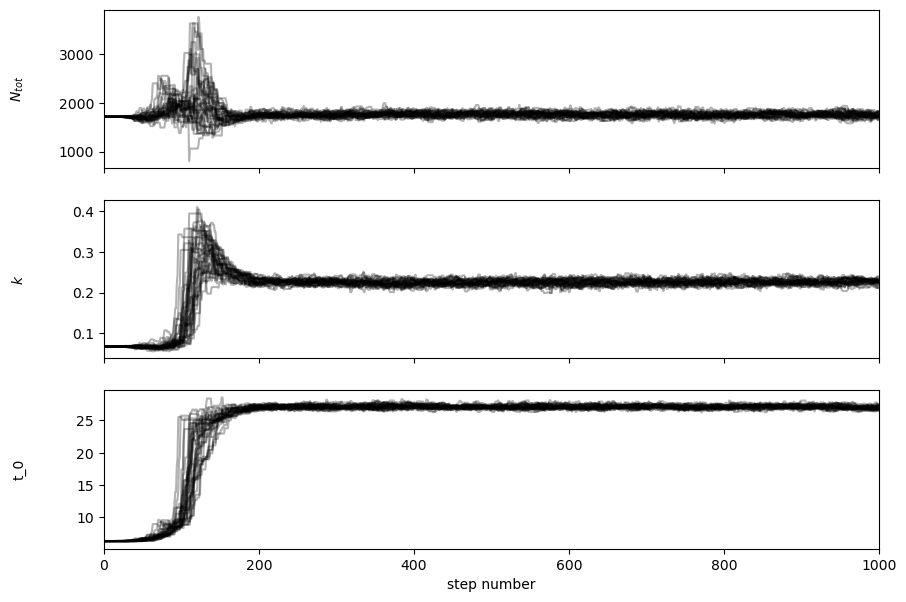

In [96]:
# grafico
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)  # axes è un array  di dimensione 2, dove il primo elemento sarà l'oggetto degli assi per il grafico superiore e il secondo elemento sarà l'oggetto degli assi per il grafico inferiore.
labels = ["$N_{tot}$", "$k$","t_0"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [97]:
tau = sampler.get_autocorr_time()
print(tau) # è buona norma eliminare le iterazioni pari a 2 o 3 volte il valore di tau.

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [21.22688484 58.99771023 94.78399639]

In [98]:
flat_samples = sampler.get_chain(discard=300, flat=True)
print(flat_samples.shape)

(22400, 3)


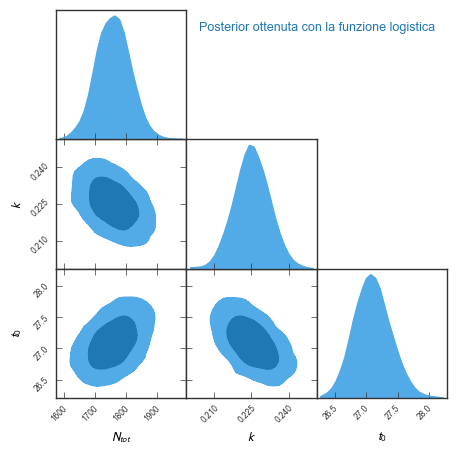

In [99]:
import pygtc
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$N_{tot}$','$k$','$t_0$'],
                    chainLabels=['Posterior ottenuta con la funzione logistica'],
                    figureSize='MNRAS_page')

Ora faccio un confronto tra la posterior ottenuta e i dati. Per farlo estraggo un campione dal campionamento Markov Chain. Per ogni elemento del campione (cioè per ogni tripletta di valori di $N_{tot}$, $k$ e $t_0$) avrò una certa predizione dei valori di aspettazione per i nuovi contagi gionalieri. Quindi faccio un grafico che riporta i nuovi positivi osservati e, per ogni giorno, la predizione al 50° percentile e la regione compresa tra il 16° e l' 84° percentile. 

In [100]:
Nsamples=1000
yarr = np.zeros((36,Nsamples)) 
for i in range(Nsamples):
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:] # seleziono una riga a caso dell'array flat_samples, 
                                                                      # ovvero prendo 3 valori dei parametri estratti dalla posterior
    N_tot, k, t_0 = theta
    yarr[:,i],_ = nuovi_contagi(N_tot, k, t_0, prima_ondata)

Text(0.5, 1.0, 'Confronto fra dati osservati e modello della funzione logistica per i primi 35 giorni')

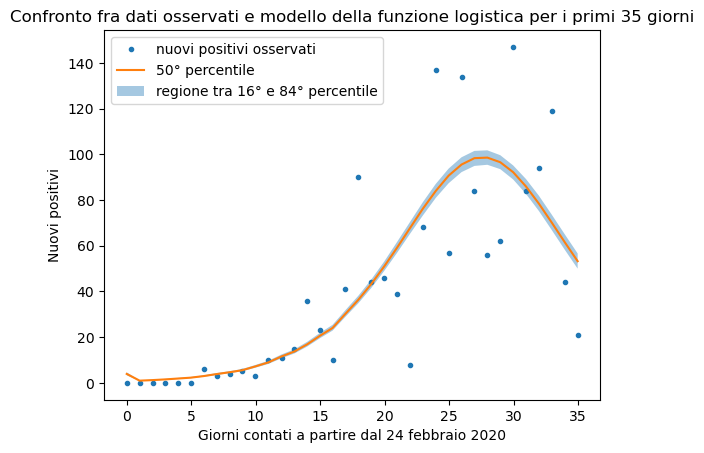

In [101]:
t_0 = prima_ondata.index[0]
differenze_temporali = (prima_ondata.index - t_0).days + (prima_ondata.index - t_0).seconds / (3600 * 24)
plt.plot(differenze_temporali, prima_ondata["nuovi_positivi"], '.', label='nuovi positivi osservati')
plt.plot(differenze_temporali,np.percentile(yarr,50,axis=1), label='50° percentile')
plt.fill_between(differenze_temporali, np.percentile(yarr,16,axis=1), np.percentile(yarr,84,axis=1), alpha=0.4, label='regione tra 16° e 84° percentile')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
plt.legend()
plt.title('Confronto fra dati osservati e modello della funzione logistica per i primi 35 giorni')

Ora faccio un confronto tra modello e dati analogo a quello appena fatto. Usando la posterior ottenuta dai primi 35 giorni, analizzo i primi 100 giorni di epidemia prendendo in considerazione sia i nuovi positivi giornalieri sia i positivi totali.

In [102]:
primi_100_giorni=dati_friuli.head(101)
# primi_100_giorni

Text(0.5, 1.0, 'Confronto cumulativo fra dati osservati e modello della funzione logistica per i primi 100 giorni')

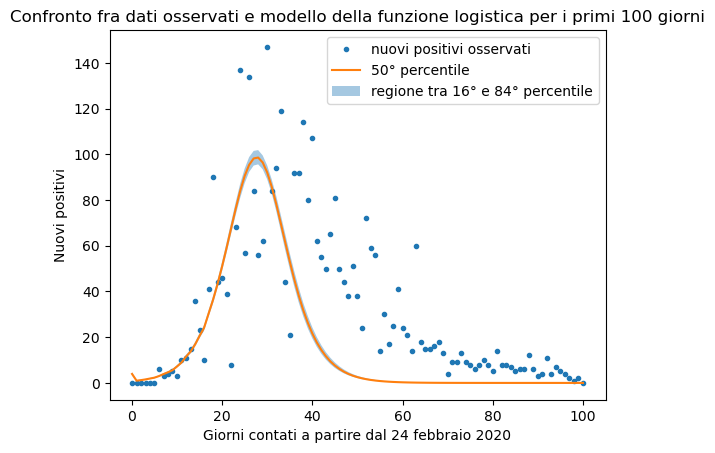

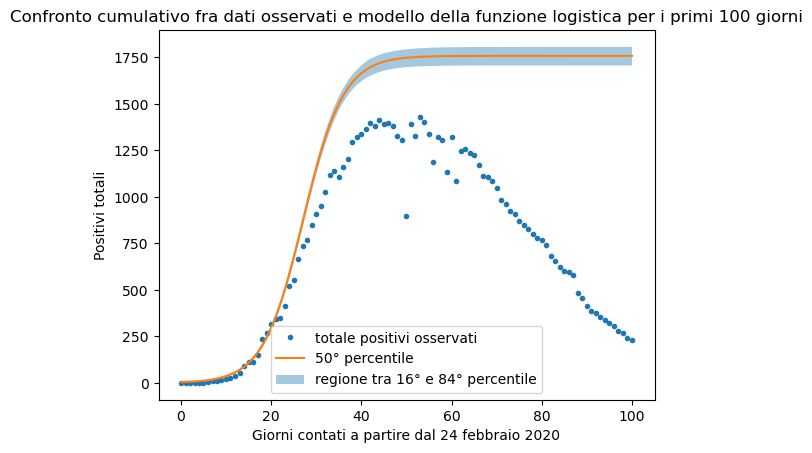

In [103]:
Nsamples=1000
yarr = np.zeros((101,Nsamples)) 
for i in range(Nsamples):
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:]                                                                    
    N_tot, k, t_0 = theta
    yarr[:,i],_ = nuovi_contagi(N_tot, k, t_0, primi_100_giorni)

t_0 = primi_100_giorni.index[0]
differenze_temporali = (primi_100_giorni.index - t_0).days + (primi_100_giorni.index - t_0).seconds / (3600 * 24)
plt.figure(1)
plt.plot(differenze_temporali, primi_100_giorni["nuovi_positivi"], '.', label='nuovi positivi osservati')
plt.plot(differenze_temporali,np.percentile(yarr,50,axis=1), label='50° percentile')
plt.fill_between(differenze_temporali, np.percentile(yarr,16,axis=1), np.percentile(yarr,84,axis=1), alpha=0.4, label='regione tra 16° e 84° percentile')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
plt.legend()
plt.title('Confronto fra dati osservati e modello della funzione logistica per i primi 100 giorni')



yarr = np.zeros((101,Nsamples)) 
for i in range(Nsamples):
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:]                                                                    
    N_tot, k, t_0 = theta
    yarr[:,i] = logistica(N_tot, k, t_0, primi_100_giorni)
plt.figure(2)    
plt.plot(differenze_temporali, primi_100_giorni["totale_positivi"], '.', label='totale positivi osservati')
plt.plot(differenze_temporali,np.percentile(yarr,50,axis=1), label='50° percentile')
plt.fill_between(differenze_temporali, np.percentile(yarr,16,axis=1), np.percentile(yarr,84,axis=1), alpha=0.4, label='regione tra 16° e 84° percentile')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Positivi totali')
plt.legend()
plt.title('Confronto cumulativo fra dati osservati e modello della funzione logistica per i primi 100 giorni')


Ora faccio la stessa cosa ma usando la funzione di Gompertz per i valori d'aspettazione della poissoniana.

In [104]:
def log_prior(theta):
    
    '''Definisce il logaritmo del prior'''
    
    N_tot, k, t_0 = theta
    if N_tot>=0 and k>=0:
        return 0.0                   
    return -np.inf


def log_likelihood(theta, dati: DataFrame)->float:
    
    '''Calcola la likelihood'''
    
    N_tot, k, t_0 = theta
    n=np.array(dati["nuovi_positivi"])
    _, nu_g= nuovi_contagi(N_tot, k, t_0, dati)  # prendo solo il secondo array restituito da nuovi_contagi.
    return np.sum(-nu_g+n*np.log(nu_g)) # ho eliminato i termini che non contengono i parametri N_tot, k, t_0



def log_posterior(theta, dati: DataFrame):
    
    '''Calcola la posterior'''
    
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, dati)

In [105]:
# valore ottimale da cui far partire il campionamento
np.random.seed(42)
nll = lambda *args: -log_posterior(*args)
initial = np.array([1000,0.1,6])
soln = minimize(nll, initial, args=(prima_ondata))
N_tot_bf, K_bf, t_0_bf = soln.x
print(soln.x)

[2.38917389e+03 9.67341443e-02 5.94313570e+00]


In [106]:
np.random.seed(42)
pos = soln.x *(1+ 1e-6 * np.random.randn(32, 3)) 
nwalkers, ndim = pos.shape 

In [107]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(prima_ondata,))

In [108]:
sampler.run_mcmc(pos, 1000, progress=True)

100%|██████████| 1000/1000 [00:52<00:00, 18.90it/s]


State([[2.49348303e+03 9.11534604e-02 4.92405896e+00]
 [2.74149870e+03 8.13574152e-02 3.49066829e+00]
 [2.58259754e+03 8.55783915e-02 4.36319003e+00]
 [2.60715474e+03 8.76676189e-02 4.91602195e+00]
 [2.56647376e+03 8.82119051e-02 4.64310221e+00]
 [2.39916222e+03 9.41441727e-02 5.43883878e+00]
 [2.45120315e+03 9.06041090e-02 4.85180451e+00]
 [2.36751611e+03 9.28518370e-02 5.06061945e+00]
 [2.40289954e+03 9.46769881e-02 5.36126359e+00]
 [2.72514309e+03 8.67218688e-02 4.41250296e+00]
 [2.60702065e+03 9.11547319e-02 5.08350698e+00]
 [2.71175509e+03 8.56020486e-02 3.97384987e+00]
 [2.75625709e+03 8.12411071e-02 3.39229416e+00]
 [2.59873225e+03 8.42275253e-02 4.16756640e+00]
 [2.60728896e+03 8.66686792e-02 4.52549896e+00]
 [2.57446138e+03 9.08667367e-02 4.76187907e+00]
 [2.66156412e+03 8.44527499e-02 4.67743242e+00]
 [2.28659775e+03 9.63349370e-02 5.63839278e+00]
 [2.60752085e+03 8.92069703e-02 5.21295735e+00]
 [2.71084521e+03 8.43407221e-02 4.32131191e+00]
 [2.88406046e+03 7.99756141e-02 3.

In [109]:
samples = sampler.get_chain()
samples.shape

(1000, 32, 3)

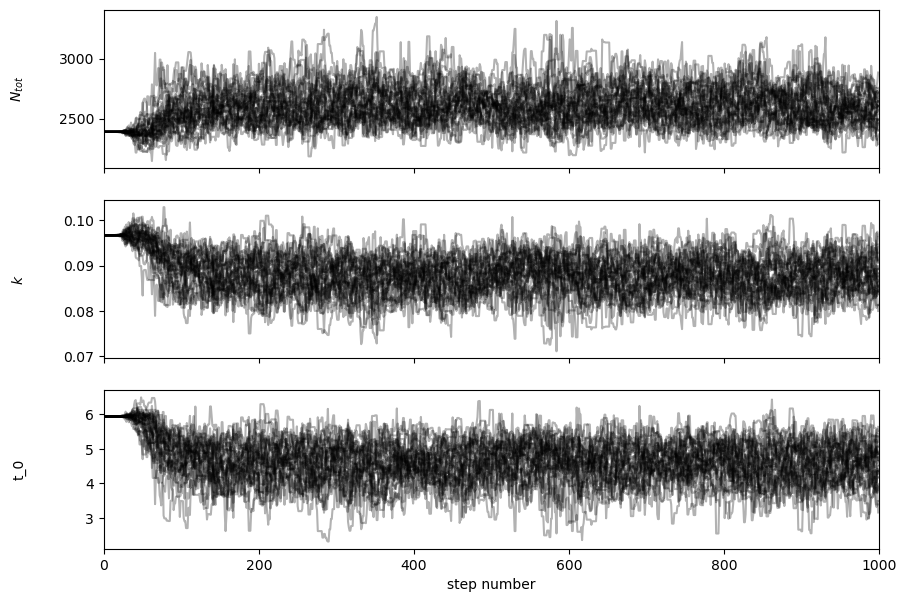

In [110]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)  # axes è un array  di dimensione 2, dove il primo elemento sarà l'oggetto degli assi per il grafico superiore e il secondo elemento sarà l'oggetto degli assi per il grafico inferiore.
labels = ["$N_{tot}$", "$k$","t_0"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [111]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [34.18085677 37.35123992 35.40757836]

In [112]:
flat_samples = sampler.get_chain(discard=120, flat=True)
print(flat_samples.shape)

(28160, 3)


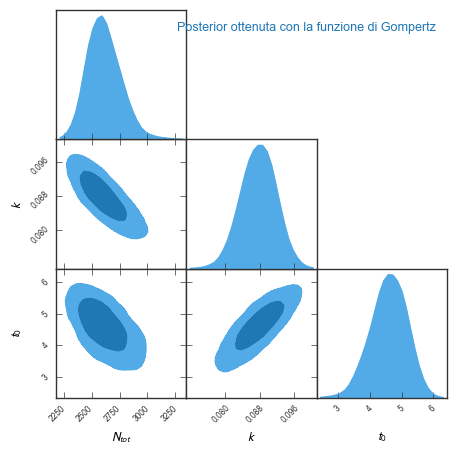

In [113]:
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$N_{tot}$','$k$','$t_0$'],
                    chainLabels=['Posterior ottenuta con la funzione di Gompertz'],
                    figureSize='MNRAS_page')

Text(0.5, 1.0, 'Confronto fra dati osservati e modello della funzione di Gompertz per i primi 35 giorni')

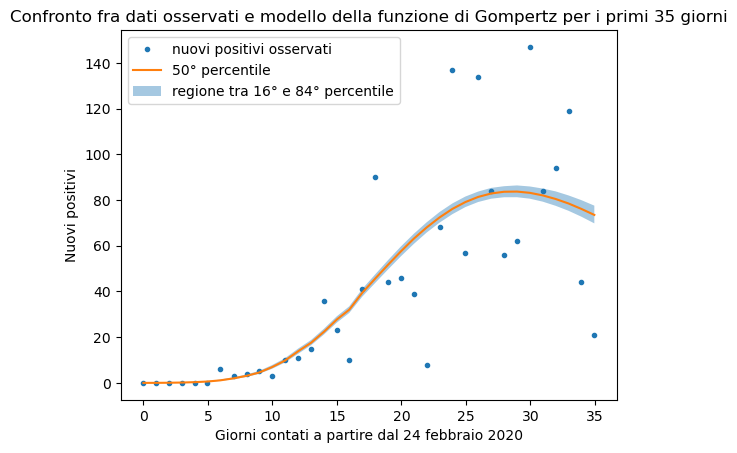

In [115]:
Nsamples=1000
yarr = np.zeros((36,Nsamples)) 
for i in range(Nsamples):
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:]                                                                  
    N_tot, k, t_0 = theta
    _, yarr[:,i] = nuovi_contagi(N_tot, k, t_0, prima_ondata) # prendo il 2° array


t_0 = prima_ondata.index[0]
differenze_temporali = (prima_ondata.index - t_0).days + (prima_ondata.index - t_0).seconds / (3600 * 24)
plt.plot(differenze_temporali, prima_ondata["nuovi_positivi"], '.', label='nuovi positivi osservati')
plt.plot(differenze_temporali,np.percentile(yarr,50,axis=1), label='50° percentile')
plt.fill_between(differenze_temporali, np.percentile(yarr,16,axis=1), np.percentile(yarr,84,axis=1), alpha=0.4, label='regione tra 16° e 84° percentile')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
plt.legend()
plt.title('Confronto fra dati osservati e modello della funzione di Gompertz per i primi 35 giorni')    


Text(0.5, 1.0, 'Confronto cumulativo fra dati osservati e modello della funzione di Gompertz per i primi 100 giorni')

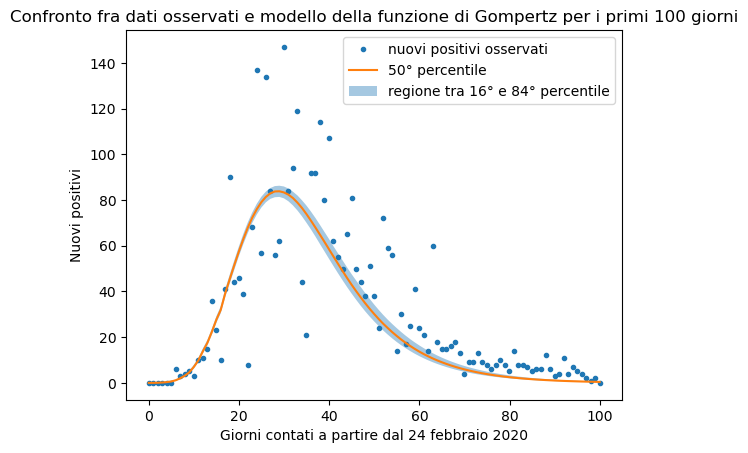

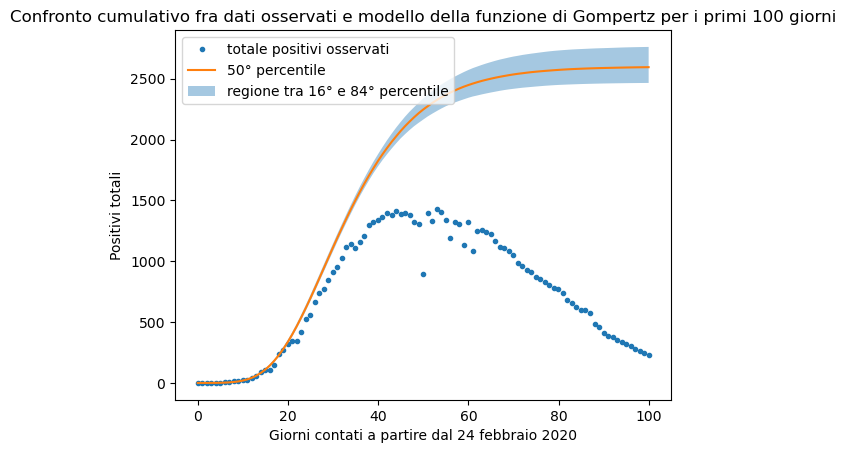

In [116]:
Nsamples=1000
yarr = np.zeros((101,Nsamples)) 
for i in range(Nsamples):
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:]                                                                    
    N_tot, k, t_0 = theta
    _, yarr[:,i] = nuovi_contagi(N_tot, k, t_0, primi_100_giorni)

t_0 = primi_100_giorni.index[0]
differenze_temporali = (primi_100_giorni.index - t_0).days + (primi_100_giorni.index - t_0).seconds / (3600 * 24)
plt.figure(1)
plt.plot(differenze_temporali, primi_100_giorni["nuovi_positivi"], '.', label='nuovi positivi osservati')
plt.plot(differenze_temporali,np.percentile(yarr,50,axis=1), label='50° percentile')
plt.fill_between(differenze_temporali, np.percentile(yarr,16,axis=1), np.percentile(yarr,84,axis=1), alpha=0.4, label='regione tra 16° e 84° percentile')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
plt.legend()
plt.title('Confronto fra dati osservati e modello della funzione di Gompertz per i primi 100 giorni')



yarr = np.zeros((101,Nsamples)) 
for i in range(Nsamples):
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:]                                                                    
    N_tot, k, t_0 = theta
    yarr[:,i] = gompertz(N_tot, k, t_0, primi_100_giorni)
plt.figure(2)    
plt.plot(differenze_temporali, primi_100_giorni["totale_positivi"], '.', label='totale positivi osservati')
plt.plot(differenze_temporali,np.percentile(yarr,50,axis=1), label='50° percentile')
plt.fill_between(differenze_temporali, np.percentile(yarr,16,axis=1), np.percentile(yarr,84,axis=1), alpha=0.4, label='regione tra 16° e 84° percentile')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Positivi totali')
plt.legend()
plt.title('Confronto cumulativo fra dati osservati e modello della funzione di Gompertz per i primi 100 giorni')


Osservando i grafici ottenuti, sembra che le funzioni logistica e di Gompertz descrivano abbastanza bene l'andamento dei nuovi positivi, riproducendo sia la fase iniziale in cui il numero di nuovi positivi giornalieri aumenta sia la fase di discesa dove ogni giorno si contano sempre meno nuovi positivi.

Per quanto rigurarda invece i contagi totali, le stesse funzioni decrivono bene i dati osservati solo per la fase iniziale. Poi i contagi totali diminuiscono mentre le due funzioni tendono asintoticamente ad un certo limite superiore.

# 4^ Parte

In [117]:
ultima_parte=dati_friuli.iloc[100:466]
ultima_parte

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-03 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,39,2,41,192,233,-11,0,2707,336,NaN,NaN,3276,138250,81683.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,34,2,36,177,213,-20,3,2730,336,NaN,NaN,3279,138942,81854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,25,2,27,153,180,-33,1,2762,338,NaN,NaN,3280,142246,83600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,24,2,26,135,161,-19,3,2784,338,NaN,NaN,3283,146338,84978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-07 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,22,4,26,125,151,-10,0,2793,339,NaN,NaN,3283,147673,85671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,36,5,41,4875,4916,-17,34,98295,3787,NaN,NaN,106998,2024787,687127.0,NaN,0.0,NaN,NaN,92301.0,14697.0,1711564.0,313223.0,ITH,ITH4
2021-05-31 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,38,5,43,4869,4912,-4,8,98307,3787,NaN,NaN,107006,2026264,687595.0,NaN,0.0,NaN,NaN,92305.0,14701.0,1712541.0,313723.0,ITH,ITH4
2021-06-01 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,36,5,41,4801,4842,-70,19,98395,3788,NaN,NaN,107025,2032361,688944.0,NaN,0.0,NaN,NaN,92321.0,14704.0,1716494.0,315867.0,ITH,ITH4


Text(0.5, 1.0, 'Nuovi positivi osservati dal 3 giugno 2020 al 3 giugno 2021')

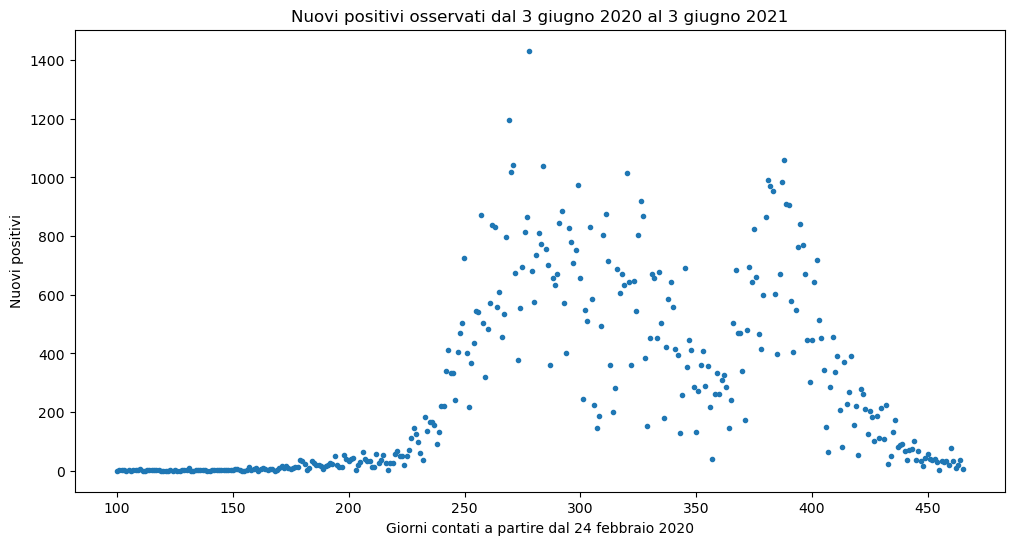

In [118]:
t_0 = dati_friuli.index[0]
differenze_temporali = (ultima_parte.index - t_0).days + (ultima_parte.index - t_0).seconds / (3600 * 24)
plt.figure(figsize=(12, 6))
plt.plot(differenze_temporali, ultima_parte["nuovi_positivi"], '.')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
plt.title('Nuovi positivi osservati dal 3 giugno 2020 al 3 giugno 2021')

Osservando il grafico sembrerebbero esserci due fasi (non molto distinte a dire la verità) di aumento e di discesa nel numero di nuovi positivi. Sembrerebbe lo stesso andamento osservato per i primi 100 giorni (duplicato due volte). Tornando a dare uno sguardo al primo grafico della seconda parte che riporta tutti i dati, si vede che i due picchi nel periodo 3 giugno 2020-3 giugno 2021 raggiungono valori molto più alti rispetto ai primi 100 giorni. Per questo motivo stimerei di nuovo i parametri $N_{tot}$, $k$, $t_0$ e farei due analisi distite per i due picchi (prenderei il giorno 350 per dividere i due picchi).